# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import random
import pandas as pd
import matplotlib.pyplot as plt


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

def simulate_dice_rolls(num_rolls=10, num_sides=6):
    dice_rolls = [random.randint(1, num_sides) for _ in range(num_rolls)]
    df = pd.DataFrame({'Roll': range(1, num_rolls + 1), 'Result': dice_rolls})
    return df

# Simulate rolling a 6-sided dice 10 times
dice_rolls_df = simulate_dice_rolls(num_rolls=10, num_sides=6)

print(dice_rolls_df)


   Roll  Result
0     1       3
1     2       4
2     3       5
3     4       4
4     5       4
5     6       4
6     7       4
7     8       2
8     9       6
9    10       2


#### 2.- Plot the results sorted by value.

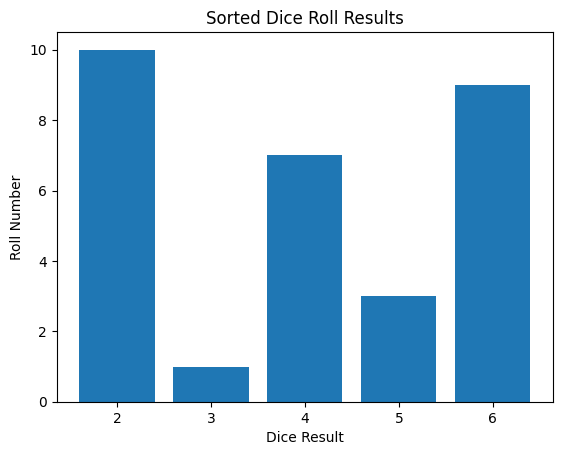

In [3]:
# your code here

sorted_df = dice_rolls_df.sort_values(by= "Result")


plt.bar(dice_rolls_df['Result'], dice_rolls_df['Roll'])
plt.xlabel('Dice Result')
plt.ylabel('Roll Number')
plt.title('Sorted Dice Roll Results')
plt.show()



#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
# your code here
# Calculating the frequency distribution
frequency_distribution = dice_rolls_df['Result'].value_counts().sort_index()
frequency_distribution


Result
2    2
3    1
4    5
5    1
6    1
Name: count, dtype: int64

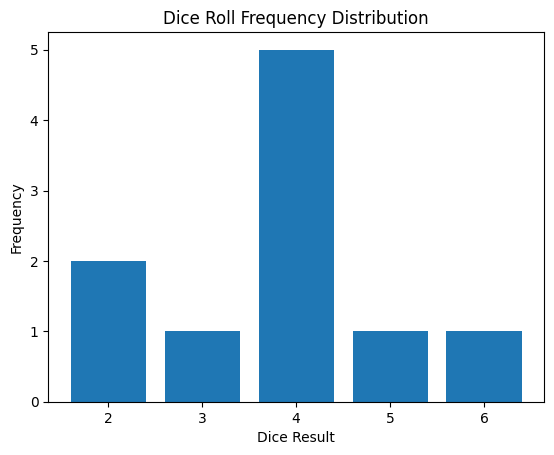

In [5]:
plt.bar(frequency_distribution.index, frequency_distribution)
plt.xlabel('Dice Result')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency Distribution')
plt.show()

In [6]:
"""
your comments here
"""
#The first one represents each individual dice roll's value and its position in the sequence of rolls. The second one, on the other hand, represents the data by showing how many times each value occured.


'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here

def calculate_mean(values):
    if len(values) == 0:
        return None 

    total = 0
    count = 0
    for value in values:
        total += value
        count += 1

    mean = total / count
    return mean


mean = calculate_mean(dice_rolls_df["Result"])
mean



3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

# Function to calculate mean using frequency distribution
def calculate_mean_frequency_distribution(values, frequencies):
    total_sum = 0
    num_observations = sum(frequencies)
    
    for value, frequency in zip(values, frequencies):
        total_sum += value * frequency
    
    mean = total_sum / num_observations
    return mean

# Example data
dice_results = [2, 4, 3, 5, 2, 6, 4, 3, 1, 5]

# Calculate frequency distribution
from collections import Counter
frequency_distribution = Counter(dice_results)
values = list(frequency_distribution.keys())
frequencies = list(frequency_distribution.values())

# Calculate mean using frequency distribution
mean_frequency_distribution = calculate_mean_frequency_distribution(values, frequencies)
print(f"Mean (Frequency Distribution): {mean_frequency_distribution}")



Mean (Frequency Distribution): 3.5


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here

def calculate_median(sorted_values):
    # Step 1: Get the number of observations
    num_observations = len(sorted_values)

    # Step 2: Check if the number of observations is odd
    if num_observations % 2 != 0:
        # Step 3: If odd, directly get the middle value as the median
        middle_index = num_observations // 2
        median = sorted_values[middle_index]
    else:
        # Step 4: If even, calculate the median as the average of the two middle values
        upper_middle_index = num_observations // 2
        lower_middle_index = upper_middle_index - 1
        median = (sorted_values[lower_middle_index] + sorted_values[upper_middle_index]) / 2

    # Step 5: Return the calculated median
    return median

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here
def calculate_quartiles(sorted_values):
    # Calculate the median (Q2)
    median = calculate_median(sorted_values)

    # Split the data into lower and upper halves
    lower_half = sorted_values[:len(sorted_values)//2]
    upper_half = sorted_values[len(sorted_values)//2:]

    # Calculate the median of the lower half (Q1)
    q1 = calculate_median(lower_half)

    # Calculate the median of the upper half (Q3)
    q3 = calculate_median(upper_half)

    # Return the quartiles
    return q1, median, q3

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

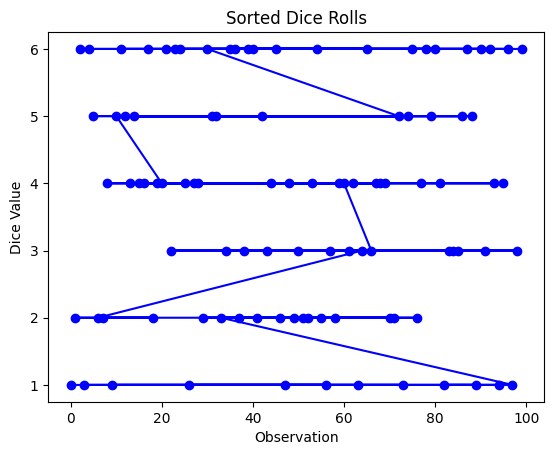

In [11]:
# your code here

df = pd.read_csv("C:/users/diana/Documents/Repos/GitHub/Descriptive-Stats/data/roll_the_dice_hundred.csv")
df.head()



# Sort the values based on the 'value' column
sorted_values = df['value'].sort_values()

# Plot the sorted values
plt.plot(sorted_values, marker='o', linestyle='-', color='b')
plt.title('Sorted Dice Rolls')
plt.xlabel('Observation')
plt.ylabel('Dice Value')
plt.show()


In [12]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
# your code here

from collections import Counter

# Function to calculate mean using frequency distribution
def calculate_mean_frequency_distribution(values, frequencies):
    total_sum = 0
    num_observations = sum(frequencies)
    
    for value, frequency in zip(values, frequencies):
        total_sum += value * frequency
    
    mean = total_sum / num_observations
    return mean

# Extract the "value" column
dice_results = df['value'].tolist()

# Calculate frequency distribution
frequency_distribution = Counter(dice_results)
values = list(frequency_distribution.keys())
frequencies = list(frequency_distribution.values())


# Calculate mean using frequency distribution
mean_frequency_distribution = calculate_mean_frequency_distribution(values, frequencies)
print(f"Mean (Frequency Distribution): {mean_frequency_distribution}")

Mean (Frequency Distribution): 3.74


#### 3.- Now, calculate the frequency distribution.



In [14]:
# Extract the "value" column
dice_results = df['value'].tolist()

# Calculate frequency distribution
frequency_distribution = Counter(dice_results)

# Display the frequency distribution
print("Frequency Distribution:")
for value, frequency in frequency_distribution.items():
    print(f"{value}: {frequency}")

Frequency Distribution:
1: 12
2: 17
6: 23
5: 12
4: 22
3: 14


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

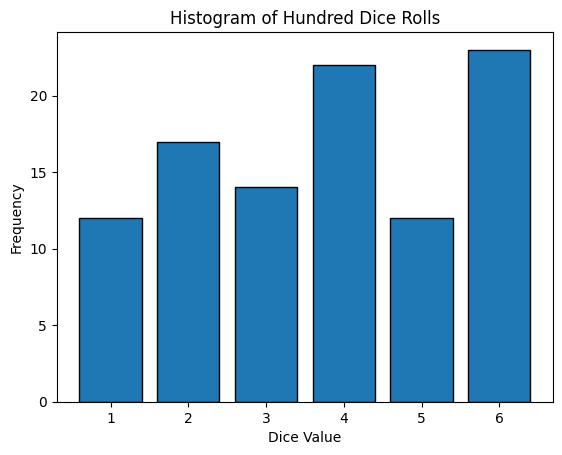

In [15]:
# your code here

# Plot the histogram
plt.hist(dice_results, bins=range(1, 8), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Histogram of Hundred Dice Rolls')
plt.show()

In [16]:
"""
your comments here

The data is not symemetric, it is positively skewed. This is evident from the higher frequency of the value 6, which us pulling the mean towards the right.
The value 1 and 5 have lower frequencies, contributing less to the overal mean.
"""




'\nyour comments here\n\nThe data is not symemetric, it is positively skewed. This is evident from the higher frequency of the value 6, which us pulling the mean towards the right.\nThe value 1 and 5 have lower frequencies, contributing less to the overal mean.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

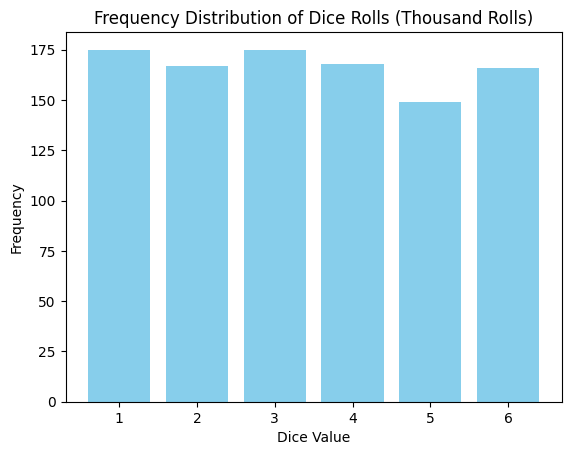

In [17]:
# your code here


df2 = pd.read_csv("C:/users/diana/Documents/Repos/GitHub/Descriptive-Stats/data/roll_the_dice_thousand.csv")
df2.head()

# Calculate the frequency distribution
frequency_distribution = df2['value'].value_counts().sort_index()

# Plot the histogram
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Rolls (Thousand Rolls)')
plt.show()


In [18]:
"""
your comments here
From this distribution, you can observe that the frequencies are relatively close to each other, with slight variations.
"""

'\nyour comments here\nFrom this distribution, you can observe that the frequencies are relatively close to each other, with slight variations.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [19]:
# your code here

ages_population = pd.read_csv("C:/users/diana/Documents/Repos/GitHub/Descriptive-Stats/data/ages_population.csv")
ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


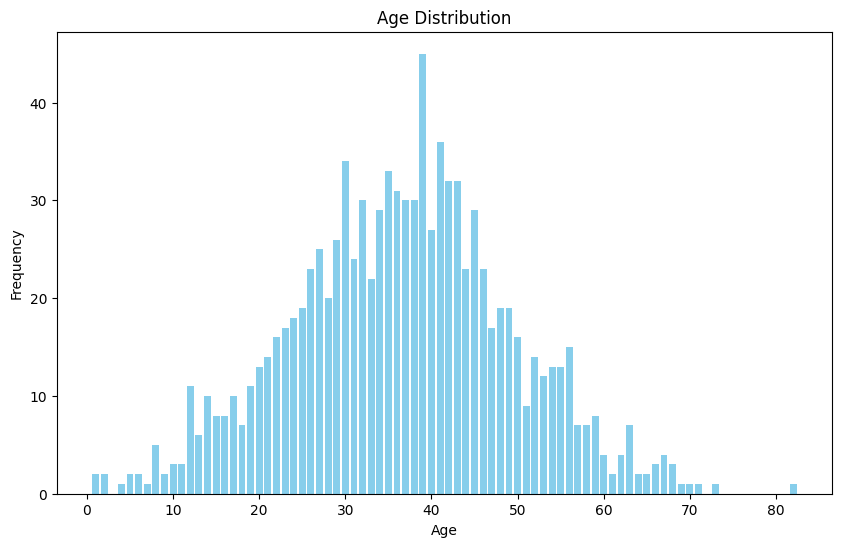

In [20]:
# Calculate frequency distribution
frequency_distribution = ages_population['observation'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [21]:
"""
your comments here

Upon examining the histogram of the age distribution, I intuitively anticipated that the mean would fall between 30 and 50 years. 
Surprisingly, the calculated mean was approximately 36.56, validating that my visual perception aligned with the numerical results. 

"""

'\nyour comments here\n\nUpon examining the histogram of the age distribution, I intuitively anticipated that the mean would fall between 30 and 50 years. \nSurprisingly, the calculated mean was approximately 36.56, validating that my visual perception aligned with the numerical results. \n\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

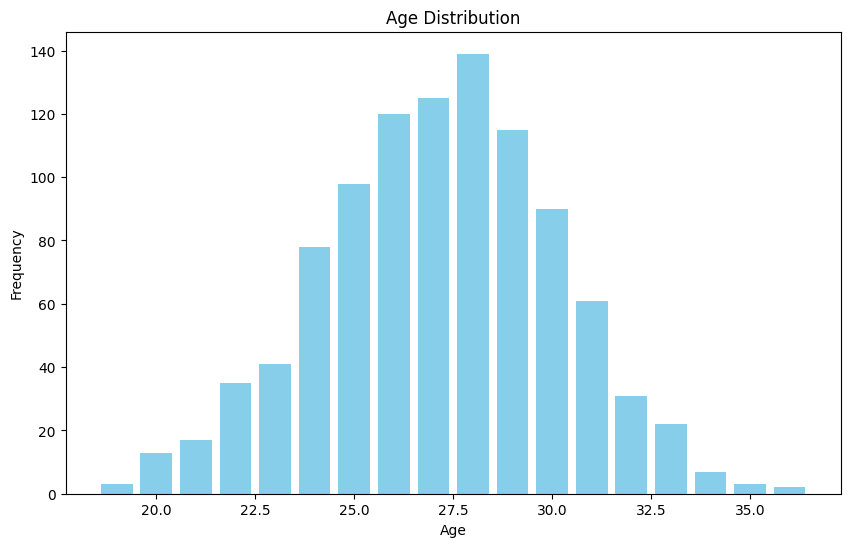

In [22]:
# your code here


ages_population2 = pd.read_csv("C:/users/diana/Documents/Repos/GitHub/Descriptive-Stats/data/ages_population2.csv")
ages_population2.head()


frequency_distribution = ages_population2['observation'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""
your comments here

Step 1 contains ages in a broader range and also the frequency distribution appears more varied and less centreted around a specific range.

Spep 2 
Focuses on a narrower age range, likely young adults.
Does not include extremely low ages, suggesting no significant presence of children.
The frequency distribution is more concentrated around ages 25-35.


"""

'\nyour comments here\n\nStep 1 contains ages in a broader range and also the frequency distribution appears more varied and less centreted around a specific range.\n\nSpep 2 \nFocuses on a narrower age range, likely young adults.\nDoes not include extremely low ages, suggesting no significant presence of children.\nThe frequency distribution is more concentrated around ages 25-35.\n\n\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [24]:
# your code here

# Calculate mean and standard deviation
mean1 = ages_population['observation'].mean()
std_dev1 = ages_population['observation'].std()

mean2 = ages_population2['observation'].mean()
std_dev2 = ages_population2['observation'].std()

# Display the results
print("ages_population:")
print(f"Mean: {mean1:.2f}, Standard Deviation: {std_dev1:.2f}")

print("\nages_population2:")
print(f"Mean: {mean2:.2f}, Standard Deviation: {std_dev2:.2f}")


ages_population:
Mean: 36.56, Standard Deviation: 12.82

ages_population2:
Mean: 27.16, Standard Deviation: 2.97


In [25]:
"""
your comments here
Data set 1

This dataset has a relatively higher mean and standard deviation, suggesting a broader and more dispersed age distribution. 
The standard deviation indicates a significant spread of ages around the mean, contributing to the dataset's variability

Data set 2 
appears to represent a more uniform and tightly clustered age group, while ages_population encompasses a broader and more diverse age range.
"""

"\nyour comments here\nData set 1\n\nThis dataset has a relatively higher mean and standard deviation, suggesting a broader and more dispersed age distribution. \nThe standard deviation indicates a significant spread of ages around the mean, contributing to the dataset's variability\n\nData set 2 \nappears to represent a more uniform and tightly clustered age group, while ages_population encompasses a broader and more diverse age range.\n"

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

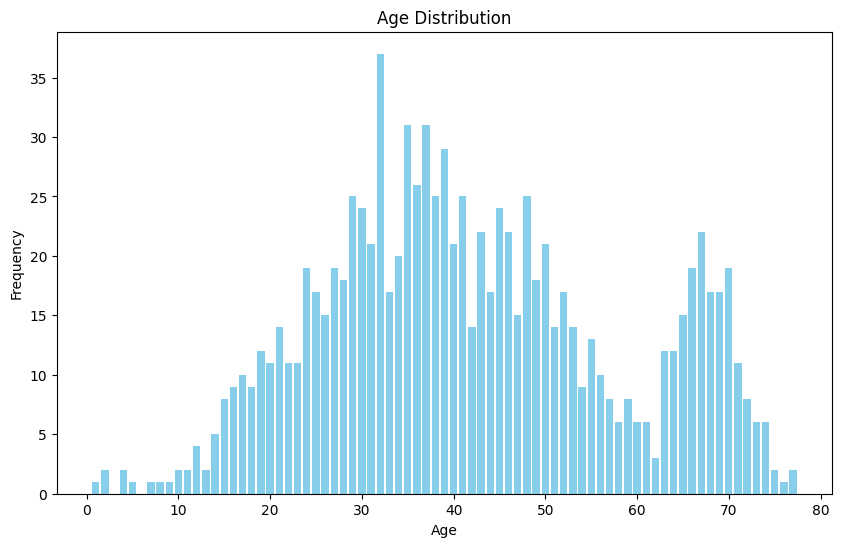

In [26]:
# your code here



ages_population3 = pd.read_csv("C:/users/diana/Documents/Repos/GitHub/Descriptive-Stats/data/ages_population3.csv")
ages_population3.head()


frequency_distribution = ages_population3['observation'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [27]:
# your code here

mean1 = ages_population['observation'].mean()
std_dev1 = ages_population['observation'].std()

mean2 = ages_population3['observation'].mean()
std_dev2 = ages_population3['observation'].std()

# Display the results
print("ages_population:")
print(f"Mean: {mean1:.2f}, Standard Deviation: {std_dev1:.2f}")

print("\nages_population3:")
print(f"Mean: {mean2:.2f}, Standard Deviation: {std_dev2:.2f}")

ages_population:
Mean: 36.56, Standard Deviation: 12.82

ages_population3:
Mean: 41.99, Standard Deviation: 16.14


In [28]:
"""
your comments here

The higher mean and standard deviation in "ages_population3" indicate that this dataset has a higher average age, and the ages are more spread out compared to "ages_population." 

"""

'\nyour comments here\n\nThe higher mean and standard deviation in "ages_population3" indicate that this dataset has a higher average age, and the ages are more spread out compared to "ages_population." \n\n'

In [30]:
ages_population3.columns

Index(['observation'], dtype='object')

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [45]:
# your code here

import numpy as np

# Function to calculate quartiles using numpy.percentile
def calculate_quartiles_np(values):
    Q1 = np.percentile(values, 25)
    Q2 = np.percentile(values, 50)
    Q3 = np.percentile(values, 75)
    Q4 = np.percentile(values, 100)
    
    return Q1, Q2, Q3, Q4

# Extract the "value" column from ages_population and ages_population3
ages_population3_values = ages_population3['observation'].dropna().tolist()

# Calculate quartiles using numpy.percentile for ages_population3
Q1_ages_population3_np, Q2_ages_population3_np, Q3_ages_population3_np, Q4_ages_population3_np = calculate_quartiles_np(ages_population3_values)

Q1_ages_population3_np, Q2_ages_population3_np, Q3_ages_population3_np, Q4_ages_population3_np






(30.0, 40.0, 53.0, 77.0)

In [46]:
"""
your comments here
The median Q2 is 40, meaning that 50% of the data is below this value.
The mean 27.6 represented by the step 2 is lower than the median, indicating left-skewness in the distribution of the data.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [51]:
# your code here

# Calculate additional percentiles
percentiles_ages_population3 = np.percentile(ages_population3_values, [10, 20, 30, 60, 80, 90])

percentiles_ages_population3

array([22., 28., 32., 45., 57., 67.])

In [52]:
"""
your comments here
The 10th percentile is lower than the percentile in ages_population2, indicating that a smaller age value represents the bottom 10% in ages_population3.
Similarly, this trend continues for the 20th and 30th percentiles, suggesting that a significant portion of ages_population3 is comprised of younger individuals compared to ages_population2.
he 60th percentile in ages_population3 is 45.0, while the 60th percentile in ages_population is 77.0. This suggests that ages_population3 has a lower age value for the 60th percentile,
indicating a younger population.
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

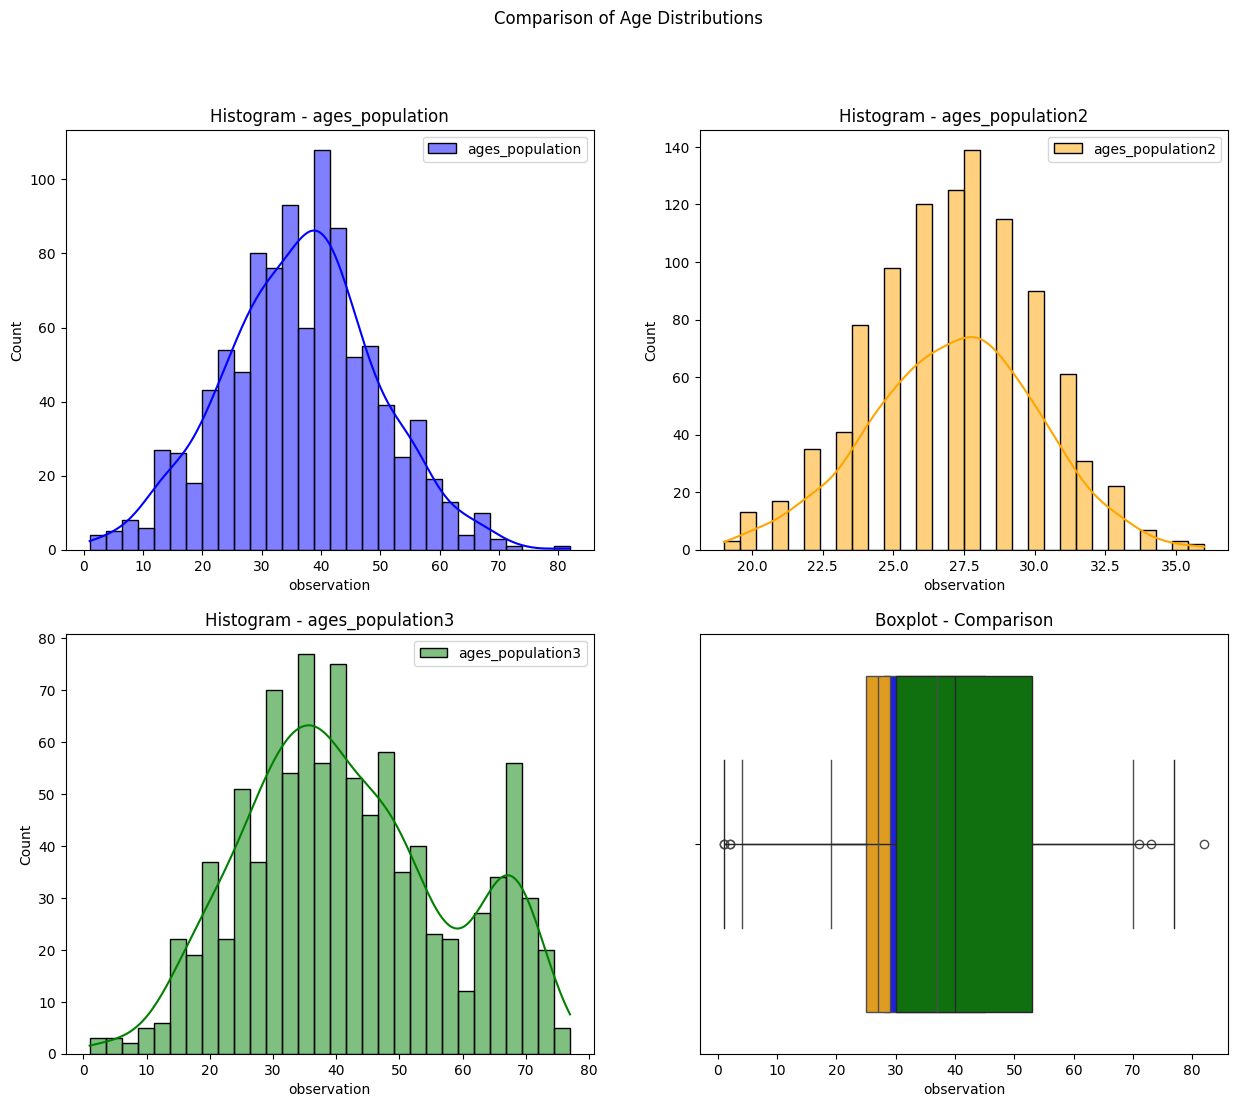

In [55]:
# your code here

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Comparison of Age Distributions')

# Histograms
sns.histplot(ages_population['observation'], bins=30, kde=True, ax=axes[0, 0], color='blue', label='ages_population')
sns.histplot(ages_population2['observation'], bins=30, kde=True, ax=axes[0, 1], color='orange', label='ages_population2')
sns.histplot(ages_population3['observation'], bins=30, kde=True, ax=axes[1, 0], color='green', label='ages_population3')

# Boxplots
sns.boxplot(x='observation', data=ages_population, ax=axes[1, 1], color='blue')
sns.boxplot(x='observation', data=ages_population2, ax=axes[1, 1], color='orange')
sns.boxplot(x='observation', data=ages_population3, ax=axes[1, 1], color='green')

# Set labels and legend
axes[0, 0].set_title('Histogram - ages_population')
axes[0, 1].set_title('Histogram - ages_population2')
axes[1, 0].set_title('Histogram - ages_population3')
axes[1, 1].set_title('Boxplot - Comparison')

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()

plt.show()




In [57]:
# Calculate mean and standard deviation
mean_std_summary = pd.DataFrame({
    'Dataset': ['ages_population', 'ages_population2', 'ages_population3'],
    'Mean': [ages_population['observation'].mean(), ages_population2['observation'].mean(), ages_population3['observation'].mean()],
    'Std Dev': [ages_population['observation'].std(), ages_population2['observation'].std(), ages_population3['observation'].std()]
})

print(mean_std_summary)

            Dataset    Mean    Std Dev
0   ages_population  36.560  12.816500
1  ages_population2  27.155   2.969814
2  ages_population3  41.989  16.144706


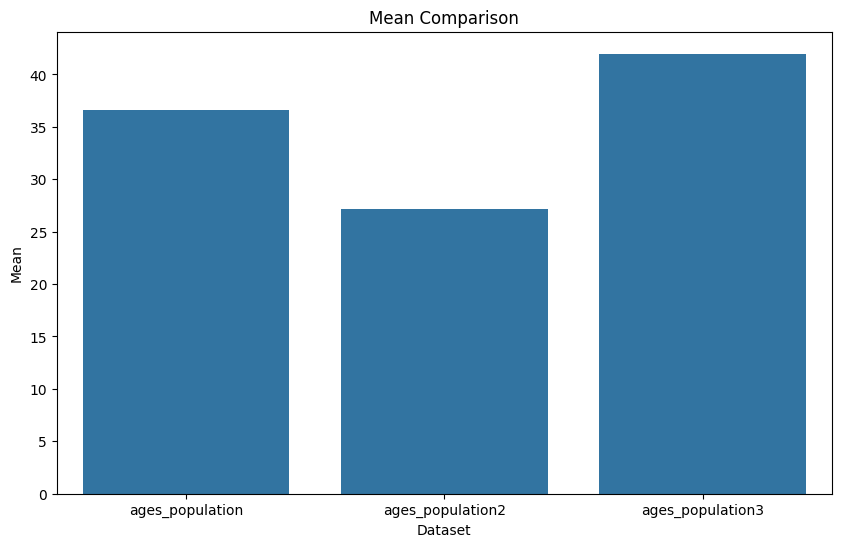

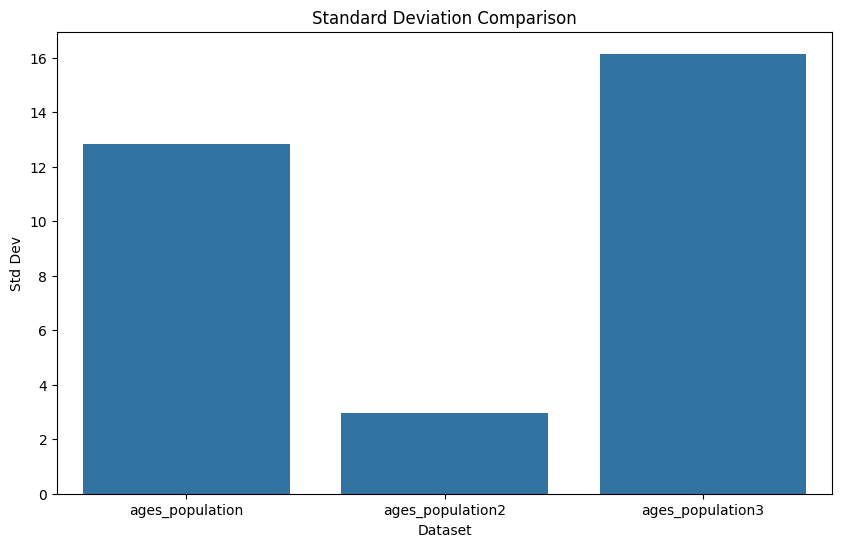

In [58]:
# Plot mean values
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Mean', data=mean_std_summary)
plt.title('Mean Comparison')
plt.show()

# Plot standard deviation values
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Std Dev', data=mean_std_summary)
plt.title('Standard Deviation Comparison')
plt.show()

In [59]:
"""
your comments here

The three datasets reflect different demographic characteristics. ages_population2 is likely to be a neighbourhood with a younger and more uniform population.
ages_population3, on the other hand, represents an older and more diverse population. ages_population falls in between, showcasing a mix of age groups.


"""

'\nyour comments here\n\nThe three datasets reflect different demographic characteristics. ages_population2 is likely to be a neighbourhood with a younger and more uniform population.\nages_population3, on the other hand, represents an older and more diverse population. ages_population falls in between, showcasing a mix of age groups.\n\n\n'